In [52]:
from PIL import Image, ImageEnhance
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.fft import fft2,fftshift,ifft2

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
img=cv2.imread('/content/drive/MyDrive/Medical_Dataset/X-ray/Pneumonia/person1015_virus_1702.jpeg')

# Apply two color enhancement methods

In [55]:
# Convert the NumPy array (img) to a PIL Image object
img = Image.fromarray(img)

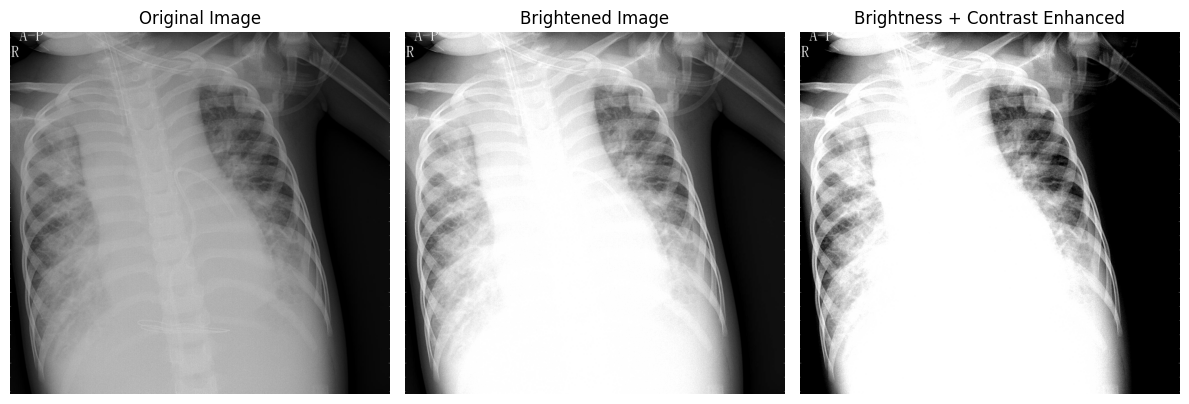

In [56]:
# 1. Brightness enhancement
enhancer_brightness = ImageEnhance.Brightness(img)
bright_img = enhancer_brightness.enhance(1.5)  # Adjust the factor as needed

# 2. Contrast enhancement
enhancer_contrast = ImageEnhance.Contrast(bright_img)
contrast_img = enhancer_contrast.enhance(1.5)  # Adjust the factor as needed

# Display the original and enhanced images side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img, cmap="gray")
plt.axis("off")

# Brightened image
plt.subplot(1, 3, 2)
plt.title("Brightened Image")
plt.imshow(bright_img, cmap="gray")
plt.axis("off")

# Brightness + Contrast enhanced image
plt.subplot(1, 3, 3)
plt.title("Brightness + Contrast Enhanced")
plt.imshow(contrast_img, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()



# Apply two histogram-based methods

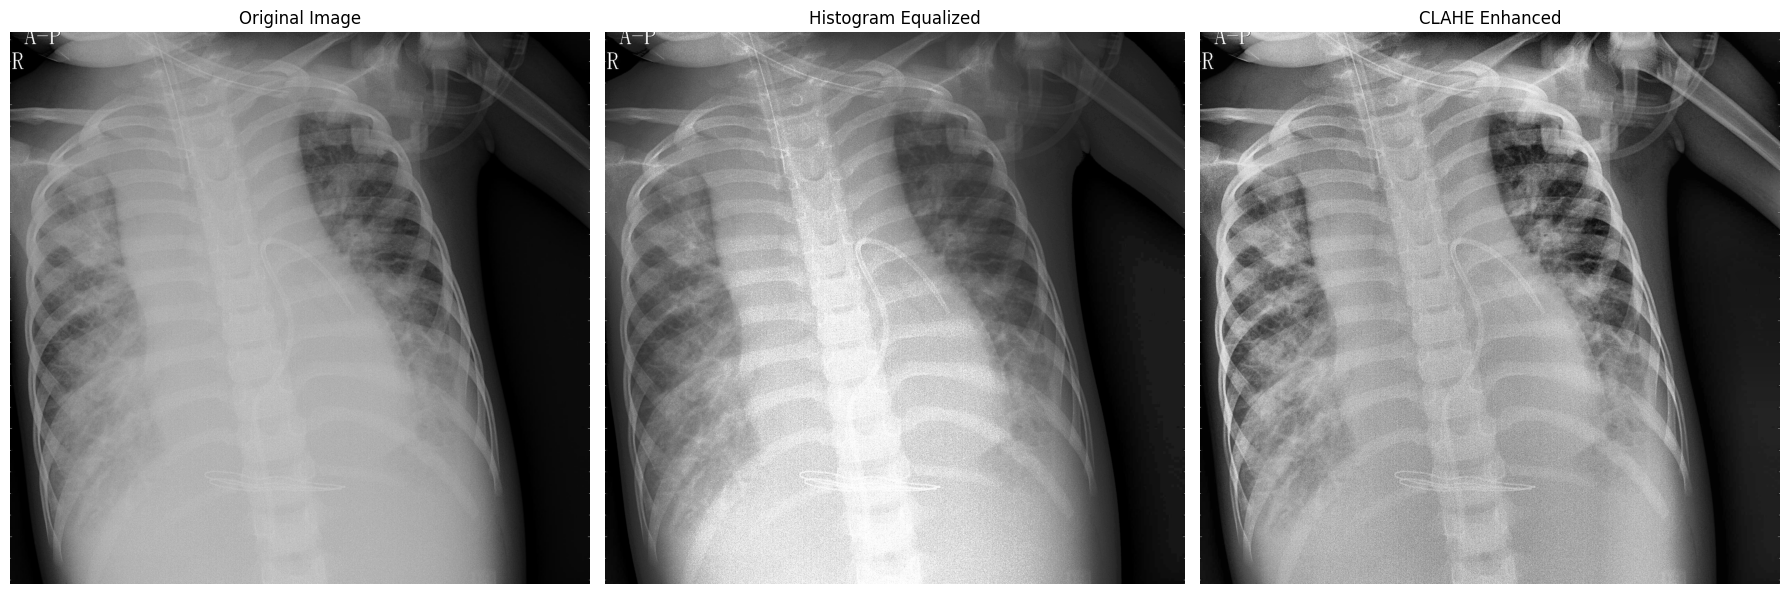

In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image_path = "/content/drive/MyDrive/Medical_Dataset/X-ray/Pneumonia/person1015_virus_1702.jpeg"  # Replace with your image file path
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded successfully
if img is None:
    raise FileNotFoundError(f"Image not found at {image_path}")

# 1. Histogram Equalization
equalized = cv2.equalizeHist(img)

# 2. CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(img)

# Display the original, histogram-equalized, and CLAHE-enhanced images
plt.figure(figsize=(18, 6))

# Original image
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img, cmap="gray")
plt.axis("off")

# Histogram Equalized image
plt.subplot(1, 3, 2)
plt.title("Histogram Equalized")
plt.imshow(equalized, cmap="gray")
plt.axis("off")

# CLAHE-enhanced image
plt.subplot(1, 3, 3)
plt.title("CLAHE Enhanced")
plt.imshow(clahe_img, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()

#Apply two spatial filtering methods

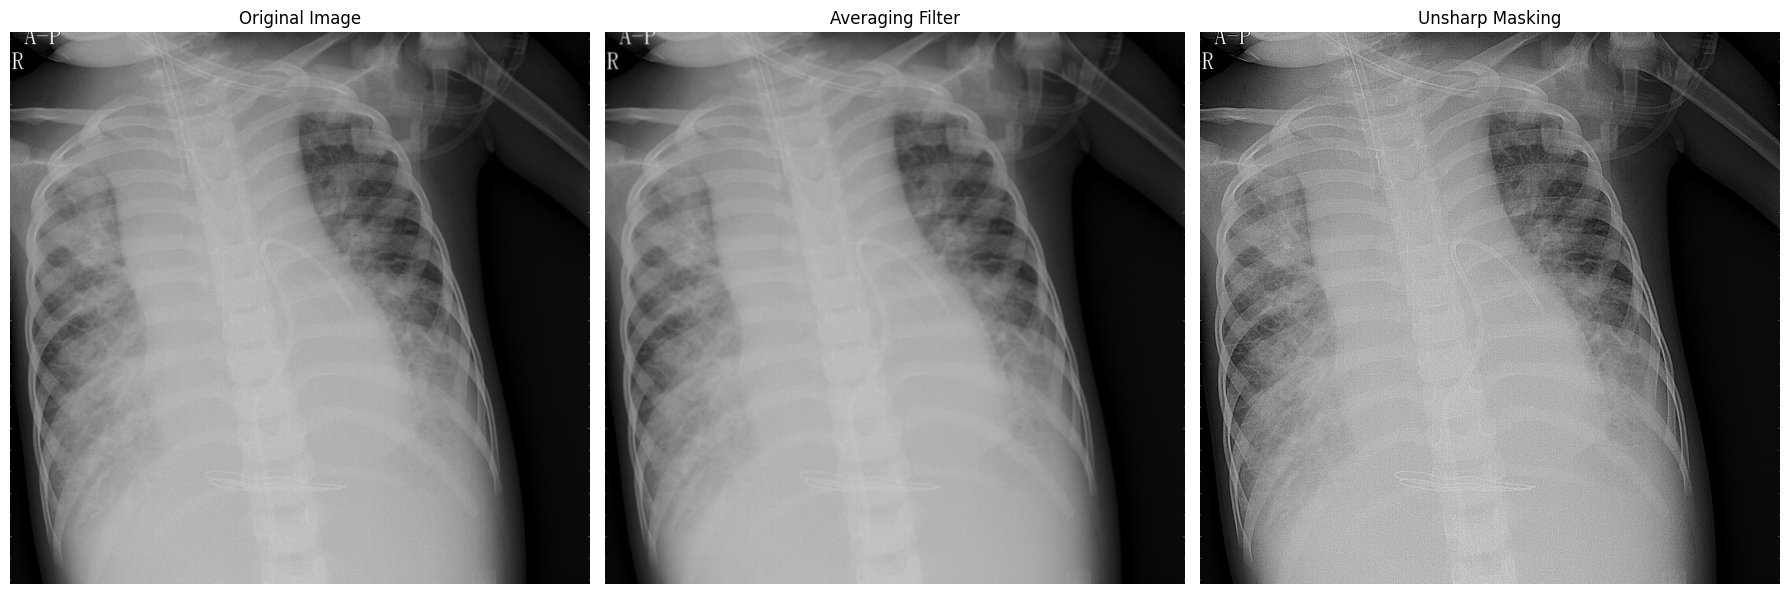

In [29]:
# Replace with your image file
img = cv2.imread("/content/drive/MyDrive/Medical_Dataset/X-ray/Pneumonia/person1015_virus_1702.jpeg", cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded successfully
if img is None:
    raise FileNotFoundError(f"Image not found at {image_path}")

# 1. Averaging Filter (Box Filter)
kernel_size = (5, 5)  # Size of the averaging filter kernel
avg_filtered = cv2.blur(img, kernel_size)

# 2. Unsharp Masking
# Create a Gaussian blurred version of the image
blurred = cv2.GaussianBlur(img, (9, 9), 10)

# Unsharp mask = Original + (Original - Blurred) * k
k = 1.5  # Scaling factor
unsharp_masked = cv2.addWeighted(img, 1 + k, blurred, -k, 0)

# Display the original and filtered images
plt.figure(figsize=(18, 6))

# Original image
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img, cmap="gray")
plt.axis("off")

# Averaging Filtered image
plt.subplot(1, 3, 2)
plt.title("Averaging Filter")
plt.imshow(avg_filtered, cmap="gray")
plt.axis("off")

# Unsharp Masked image
plt.subplot(1, 3, 3)
plt.title("Unsharp Masking")
plt.imshow(unsharp_masked, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()

# Apply two frequency domain methods

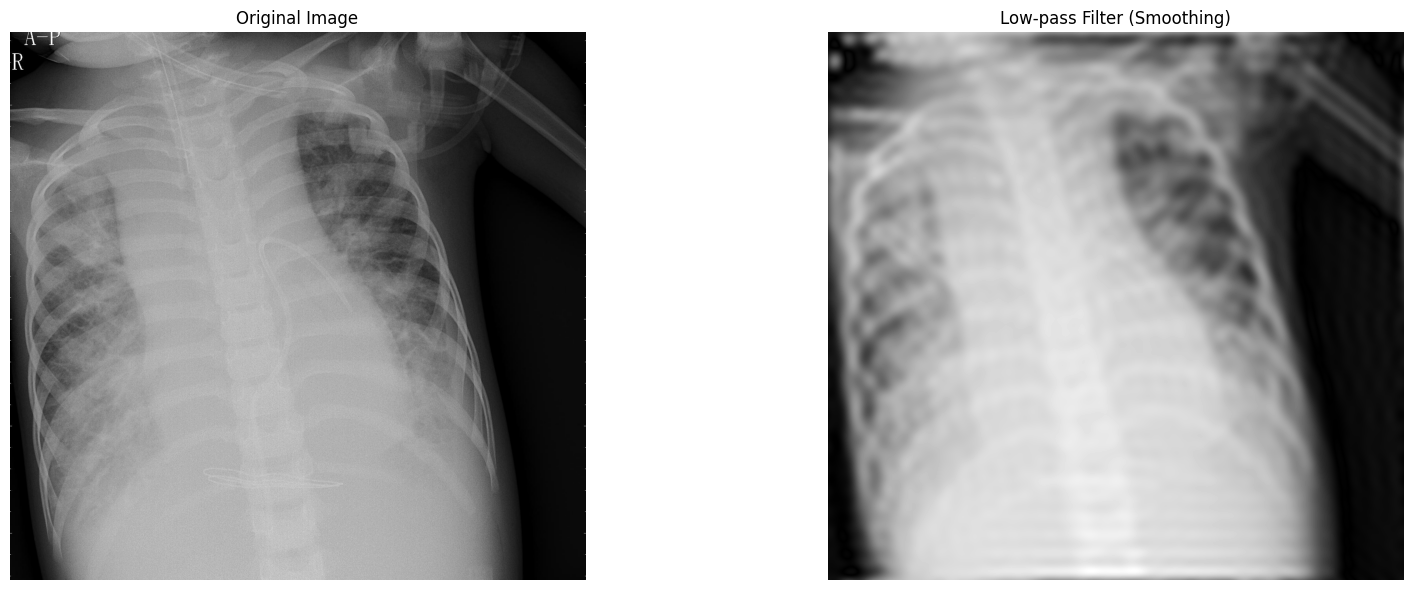

In [31]:
# Load the image in grayscale
image_path = "/content/drive/MyDrive/Medical_Dataset/X-ray/Pneumonia/person1015_virus_1702.jpeg"  # Replace with your image file path
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


# Perform FFT (Fast Fourier Transform) to get the frequency domain representation
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)  # Shift the zero frequency component to the center

# Get the magnitude spectrum (optional for visualization)
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

# Create a mask for filtering
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2  # Center of the image

# 1. Low-pass filter (Smoothing)
mask_low = np.zeros((rows, cols, 2), np.uint8)
mask_low[crow - 30:crow + 30, ccol - 30:ccol + 30] = 1  # Define a square low-pass filter

low_pass_dft = dft_shift * mask_low  # Apply the low-pass mask
low_pass_ishift = np.fft.ifftshift(low_pass_dft)  # Inverse shift
low_pass_img = cv2.idft(low_pass_ishift)
low_pass_img = cv2.magnitude(low_pass_img[:, :, 0], low_pass_img[:, :, 1])  # Get the spatial domain result


# Normalize images for visualization
low_pass_img = cv2.normalize(low_pass_img, None, 0, 255, cv2.NORM_MINMAX)


# Display the original, low-pass filtered, and high-pass filtered images
plt.figure(figsize=(18, 6))

# Original image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap="gray")
plt.axis("off")

# Low-pass filtered image
plt.subplot(1, 2, 2)
plt.title("Low-pass Filter (Smoothing)")
plt.imshow(low_pass_img, cmap="gray")
plt.axis("off")



plt.tight_layout()
plt.show()

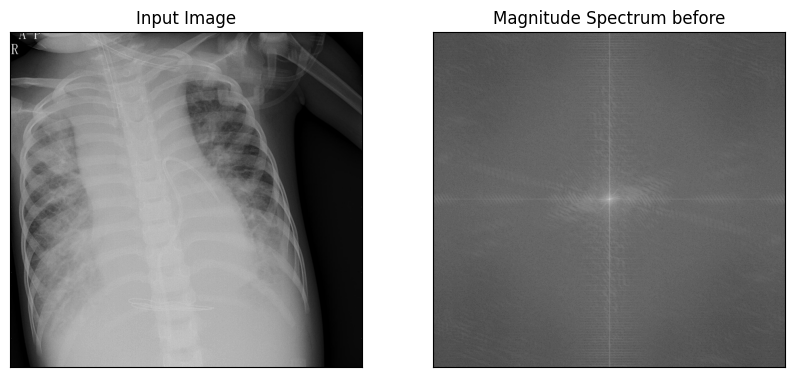

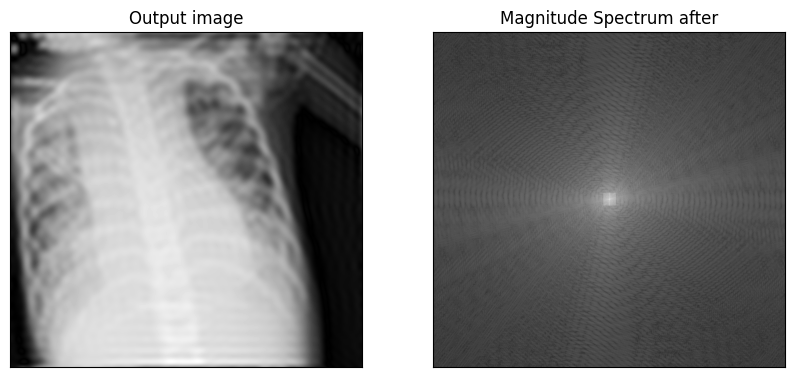

In [37]:
img = cv2.imread('/content/drive/MyDrive/Medical_Dataset/X-ray/Pneumonia/person1015_virus_1702.jpeg', cv2.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.figure(figsize=(10,5))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum before'), plt.xticks([]), plt.yticks([])
plt.show()
rows, cols = img.shape
crow, ccol = rows//2, cols//2

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

# Plot the magnitude spectrum of the filtered image
dft_back = cv2.dft(np.float32(img_back), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift_back = np.fft.fftshift(dft_back)
magnitude_spectrum_back = 20 * np.log(cv2.magnitude(dft_shift_back[:,:,0], dft_shift_back[:,:,1]))

plt.figure(figsize=(10,5))
plt.subplot(121),plt.imshow(img_back, cmap = 'gray')
plt.title('Output image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum_back, cmap = 'gray')
plt.title('Magnitude Spectrum after'), plt.xticks([]), plt.yticks([])
plt.show()